# Image Classification (Fashion MNIST Dataset)¶

### Importing required packages 

In [40]:
#Importing required packages
from __future__ import absolute_import, division, print_function
from keras.layers.advanced_activations import LeakyReLU, PReLU

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
np.random.seed(100)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1.12.0


### Loading the Fashion MNIST Data into train and test datasets

In [41]:
#Loading the Fashion MNIST Data into train and test datasets
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [42]:
test_labels.shape

(10000,)

In [43]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [44]:
# Classifying labels to each output class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

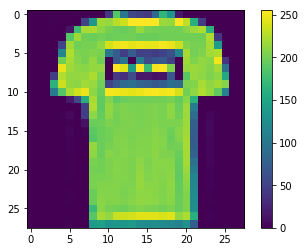

In [45]:
# Inspecting the pixels in first Image
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [46]:
#Normalizing the data between 0-1

train_images = train_images / 255.0

test_images = test_images / 255.0

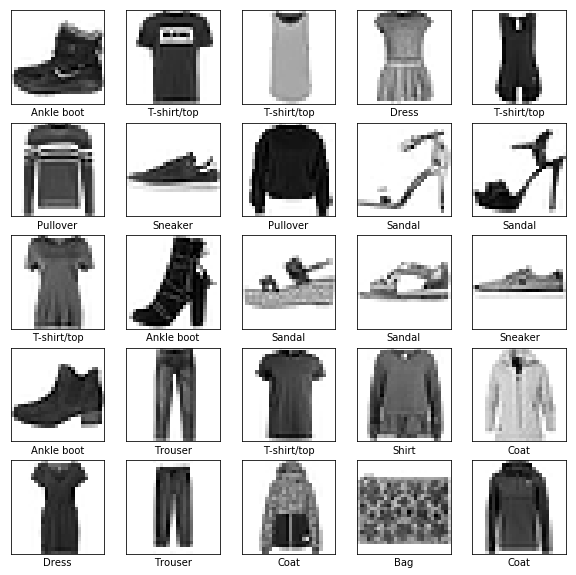

In [47]:
# Checking first 25 images in training data along with the labels

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



We have used Keras Library to build the Neural Network to classify the images. To build network we followed following steps:
1.  Initialized the model using Sequential()
2. Add first layer i.e input layer. The image has 28 x 28 pixels, in order to feed it into the model, we have to first flatten the image using Flatten function in Keras. 
3. Add first hidden layer using Dense function with proper choice of activation function.
4. Add output layer.
5. Once the model is built, compile the model by selecting appropriate choice of optimizer and loss.
6. Fit the model to training data. Here we have used 15% of training data as validation set.

## Neural Netwrok using RELU as Hidden Layer

### Accuracy
    Training Set:   89.06%          
    Validation Set: 88.62%   
    Test Set:       87.7%

In [56]:
# Initializing model and Adding Layers
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compiling the Model
model_1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Fitting Model Train Data
fit_1 = model_1.fit(train_images, train_labels,validation_split=0.15,  epochs=5)

Train on 51000 samples, validate on 9000 samples
Epoch 1/5
51000/51000 [==============================] - 3s 66us/step - loss: 0.5059 - acc: 0.8243 - val_loss: 0.4171 - val_acc: 0.8527
Epoch 2/5
51000/51000 [==============================] - 3s 53us/step - loss: 0.3792 - acc: 0.8648 - val_loss: 0.3742 - val_acc: 0.8690
Epoch 3/5
51000/51000 [==============================] - 3s 52us/step - loss: 0.3379 - acc: 0.8768 - val_loss: 0.3553 - val_acc: 0.8758
Epoch 4/5
51000/51000 [==============================] - 3s 53us/step - loss: 0.3115 - acc: 0.8853 - val_loss: 0.3337 - val_acc: 0.8817
Epoch 5/5
51000/51000 [==============================] - 3s 54us/step - loss: 0.2940 - acc: 0.8906 - val_loss: 0.3125 - val_acc: 0.8862


In [57]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 25us/step
Test accuracy: 0.877


In [59]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

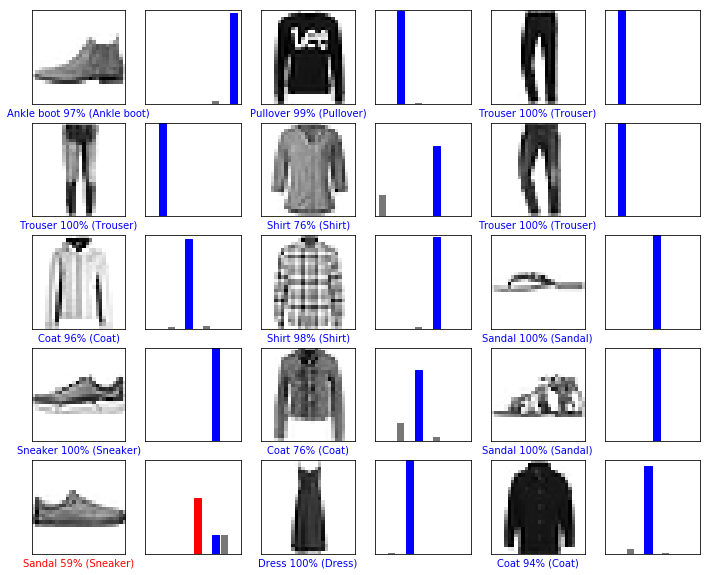

In [60]:
# Predicting the labels of images 
predictions = model_1.predict(test_images)

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

## Neural Netwrok using Leaky RELU as Hidden Layer

The activation function used is Leaky Relu. Repeat all the above steps from 1-6 but change the activation function.

### Accuracy:
    Training Set:   89.05%
    Validation Set: 87.97%
    Test Set:       87.32%

In [61]:
# Building model using Leaky RELU as activation
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(150),
    keras.layers.LeakyReLU(alpha=0.01),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compiling the Model
model_2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fitting the model on Train and Test Data
fit_2 = model_2.fit(train_images, train_labels,validation_split=0.15,  epochs=5)

Train on 51000 samples, validate on 9000 samples
Epoch 1/5
51000/51000 [==============================] - 4s 72us/step - loss: 0.5095 - acc: 0.8205 - val_loss: 0.4005 - val_acc: 0.8580
Epoch 2/5
51000/51000 [==============================] - 3s 56us/step - loss: 0.3834 - acc: 0.8605 - val_loss: 0.3795 - val_acc: 0.8632
Epoch 3/5
51000/51000 [==============================] - 3s 61us/step - loss: 0.3424 - acc: 0.8754 - val_loss: 0.3590 - val_acc: 0.8697
Epoch 4/5
51000/51000 [==============================] - 3s 56us/step - loss: 0.3141 - acc: 0.8851 - val_loss: 0.3386 - val_acc: 0.8772
Epoch 5/5
51000/51000 [==============================] - 3s 55us/step - loss: 0.2950 - acc: 0.8905 - val_loss: 0.3281 - val_acc: 0.8797


In [62]:
# Computing Loss and Accuracy on test data
test_loss, test_acc = model_2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/step
Test accuracy: 0.8732


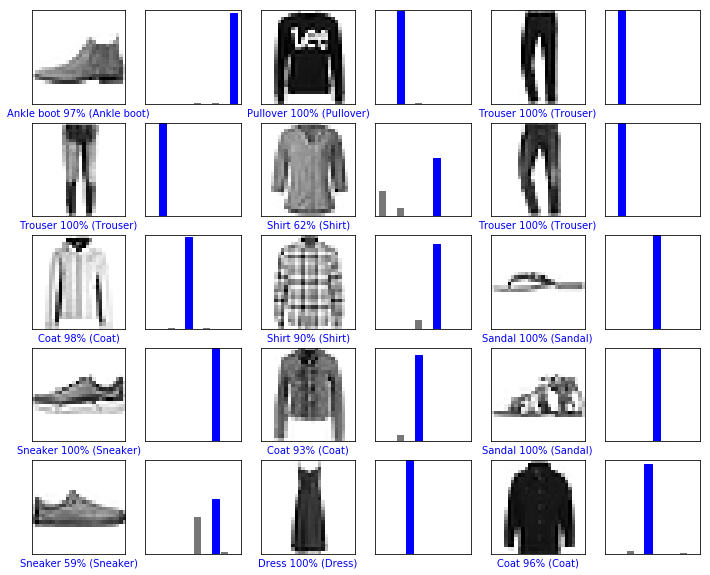

In [16]:
# Predicting Class of test images
predictions = model2.predict(test_images)


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)



### Different Choice of Optimizers

From the plots of Loss and Accuracies on training, validation and test data using different optimizers, we can see that ADAM Optimizer has perfromed well among all other optimizer choices for Fashion MNIST dataset. 
 
  

In [63]:
# Create a list of all optimizers
optimizers = ["sgd","rmsprop","adam","adagrad","adadelta"]

In [64]:
# Define dictionaries as fit_3,test_loss,test_accuracy to 
# store model.fit, testloss, test accuracy results for each optimizer for further use
fit_3={}                           
test_loss={}
test_accuracy={}
for i in optimizers:
    model_3 = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(150, activation="relu"),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model_3.compile(optimizer=i, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    fit_3[i] = model_3.fit(train_images, train_labels,validation_split=0.15, epochs=5)
    test_loss[i],test_accuracy[i] = model_3.evaluate(test_images, test_labels)

Train on 51000 samples, validate on 9000 samples
Epoch 1/5
51000/51000 [==============================] - 3s 61us/step - loss: 0.7538 - acc: 0.7571 - val_loss: 0.5801 - val_acc: 0.7977
Epoch 2/5
51000/51000 [==============================] - 2s 47us/step - loss: 0.5255 - acc: 0.8232 - val_loss: 0.5046 - val_acc: 0.8241
Epoch 3/5
51000/51000 [==============================] - 3s 50us/step - loss: 0.4778 - acc: 0.8362 - val_loss: 0.4682 - val_acc: 0.8357
Epoch 4/5
51000/51000 [==============================] - 2s 43us/step - loss: 0.4518 - acc: 0.8441 - val_loss: 0.4578 - val_acc: 0.8392
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step
Train on 51000 samples, validate on 9000 samples
Epoch 1/5
51000/51000 [==============================] - 3s 65us/step - loss: 0.5235 - acc: 0.8147 - val_loss: 0.4270 - val_acc: 0.8480
Epoch 2/5
51000/51000 [==============================] - 3s 54us/step - loss: 0.3858 - acc: 0.8605 - val_loss: 0.3728 - val_acc: 0.8683
Epoch 3/5
51000/

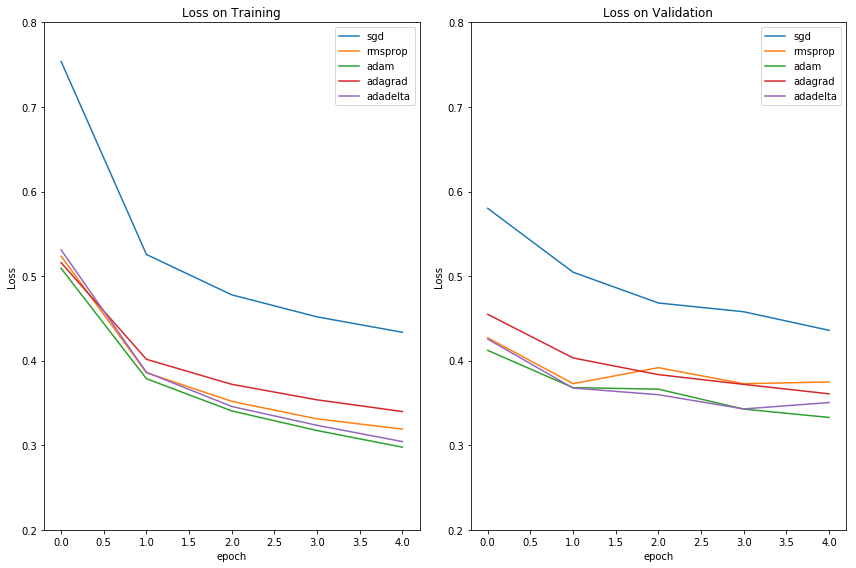

In [77]:
# Plotting Loss on training and validation data sets for each optimizer for each epoch

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,8))
for i in optimizers:
    axes[0].plot(fit_3[i].history["loss"],label='%s' % i)
    axes[1].plot(fit_3[i].history["val_loss"],label='%s' % i)
    
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss on Training')
axes[0].legend()
axes[0].set_ylim([0.2, 0.8])


axes[1].set_xlabel('epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss on Validation')   
axes[1].legend()
axes[1].set_ylim([0.2, 0.8])


fig
plt.tight_layout() 

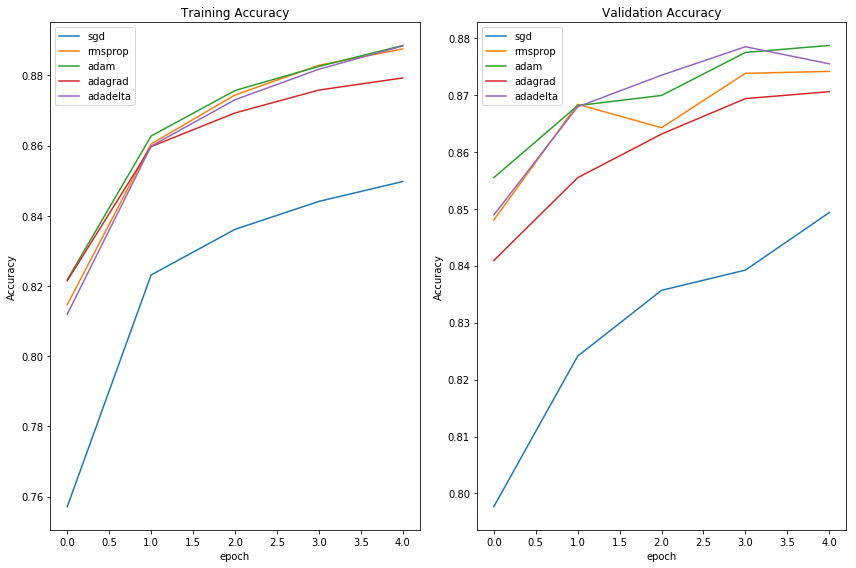

In [78]:
# Plotting Accuracy on training and validation data sets for each optimizer for each epoch

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,8))
for i in optimizers:
    axes[0].plot(fit_3[i].history["acc"],label='%s' % i)
    axes[1].plot(fit_3[i].history["val_acc"],label='%s' % i)
    
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training Accuracy')
axes[0].legend()


axes[1].set_xlabel('epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Validation Accuracy')   
axes[1].legend()
#axes[1].set_ylim([0.7, 0.9])

fig
plt.tight_layout()

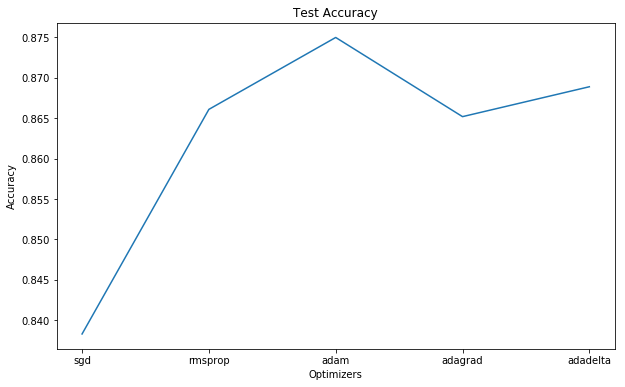

In [79]:
# Plotting accuracy on test data sets for each optimizer

name=list(test_accuracy.keys())
data=list(test_accuracy.values())
plt.figure(figsize=(10,6))
plt.plot(name,data)
plt.title("Test Accuracy")
plt.xlabel("Optimizers")
plt.ylabel("Accuracy")
plt.show()



#### Increase Hidden Units: 
When we increse number of hidden units to 2000, the accuracy of model is nearly same as of the model with 150 units. But there may be chances of overfitting.

#### Decrese Hidden Units:
When we decrese the number of hidden units to 10, the accuracy of model has dropped to 83% from 87% on test data.

In [80]:
# Increasing Number of Hidden Units to 2000

model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2000, activation="relu"),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compiling the Model
model_4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Fitting Model to test and Train Data
fit_4 = model_4.fit(train_images, train_labels,validation_split=0.15,  epochs=5)

Train on 51000 samples, validate on 9000 samples
Epoch 1/5
51000/51000 [==============================] - 16s 313us/step - loss: 0.4807 - acc: 0.8269 - val_loss: 0.4145 - val_acc: 0.8490
Epoch 2/5
51000/51000 [==============================] - 14s 277us/step - loss: 0.3679 - acc: 0.8643 - val_loss: 0.3661 - val_acc: 0.8648
Epoch 3/5
51000/51000 [==============================] - 14s 278us/step - loss: 0.3256 - acc: 0.8807 - val_loss: 0.3443 - val_acc: 0.8734
Epoch 4/5
51000/51000 [==============================] - 14s 279us/step - loss: 0.3000 - acc: 0.8905 - val_loss: 0.3490 - val_acc: 0.8743
Epoch 5/5
51000/51000 [==============================] - 15s 289us/step - loss: 0.2793 - acc: 0.8954 - val_loss: 0.3620 - val_acc: 0.8706


In [82]:
test_loss,test_acc=model_4.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 74us/step


0.8643

In [86]:
# Decresing number of Hidden units to 10

model_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compiling the Model
model_5.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Fitting Model to test and Train Data
fit_5 = model_5.fit(train_images, train_labels,validation_split=0.15,  epochs=5)

Train on 51000 samples, validate on 9000 samples
Epoch 1/5
51000/51000 [==============================] - 3s 57us/step - loss: 0.6717 - acc: 0.7736 - val_loss: 0.5196 - val_acc: 0.8157
Epoch 2/5
51000/51000 [==============================] - 2s 35us/step - loss: 0.4820 - acc: 0.8330 - val_loss: 0.4761 - val_acc: 0.8330
Epoch 3/5
51000/51000 [==============================] - 2s 36us/step - loss: 0.4459 - acc: 0.8452 - val_loss: 0.4399 - val_acc: 0.8474
Epoch 4/5
51000/51000 [==============================] - 2s 35us/step - loss: 0.4213 - acc: 0.8535 - val_loss: 0.4355 - val_acc: 0.8479
Epoch 5/5
51000/51000 [==============================] - 2s 34us/step - loss: 0.4074 - acc: 0.8586 - val_loss: 0.4196 - val_acc: 0.8549


In [85]:
test_loss,test_acc=model_5.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 0s 18us/step


0.8396